In [96]:
%matplotlib notebook
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # enables 3D plotting

from sklearn.datasets import make_low_rank_matrix
from sklearn.decomposition import PCA

sys.path.insert(0, './fashion-mnist/utils')
import mnist_reader


# Dimensionality Reduction Using PCA

In this notebook we are going to explore the concept of dimensionality reduction using PCAs. We will use Fashion-MNIST data located at: https://github.com/zalandoresearch/fashion-mnist

## Objectives
    We want to explore two use cases for dimensionality reduction: 
    1. Visualize our data (which has the dimension of 784 here) in 3d space, and analyze how it might be useful
    2. Compress our images using dimensionality reduction, and compare results when reconstructing the image from the pca


#### Load the data
We load the data using the tool provided under util of fashion-mnist repository.
We just keep 1000 instances of the data to speed things up for visualization: 

In [100]:
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')
X_train = X_train[0:1000,]
y_train = y_train[0:1000,]

### A Visual Sample of Data
Our data is now loaded, Let's see some of it:  

<IPython.core.display.Javascript object>


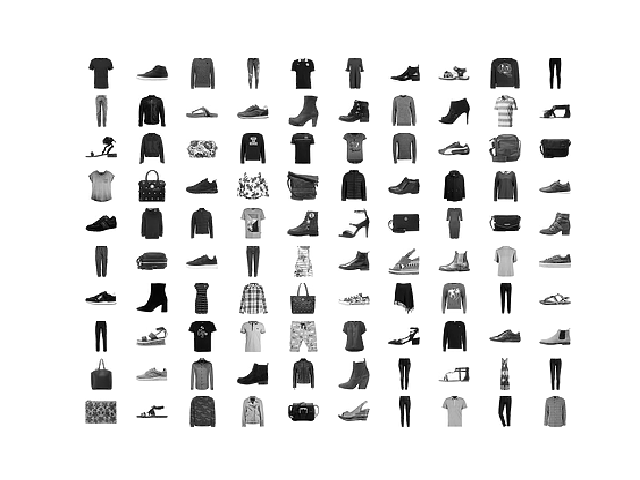

In [101]:
columns = 10
rows = 10
image_ids = np.random.choice(X_train.shape[0], size = rows*columns, replace=False)
fig = plt.figure()
for i,image_id in enumerate(image_ids):
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.imshow(X_train[image_id].reshape(28,-1), cmap='binary')
    ax.axis('off')
plt.show()

### Visualizing the Data in the Feature Space
Each of our instances of the data is 28x28 grayscale image, so we have 784 features in our feature space. How can we visualize our data? Here is when PCA comes into play. Using a liner composition of existing features, PCA comes up with vectors along which our data has the highest variance. 
#### How does PCA work? 
PCA works simply by finding the eigen vectors of covariance matrix ($\mathbf{X}^\intercal \mathbf{X}$), and sorts them according to their eigenvalues. The vector with the highest eigenvalue is our best new feautre(data has the highest variance along it). 

Below we fit a PCA on our data, and plot the data according to the best 3 components: 


<IPython.core.display.Javascript object>


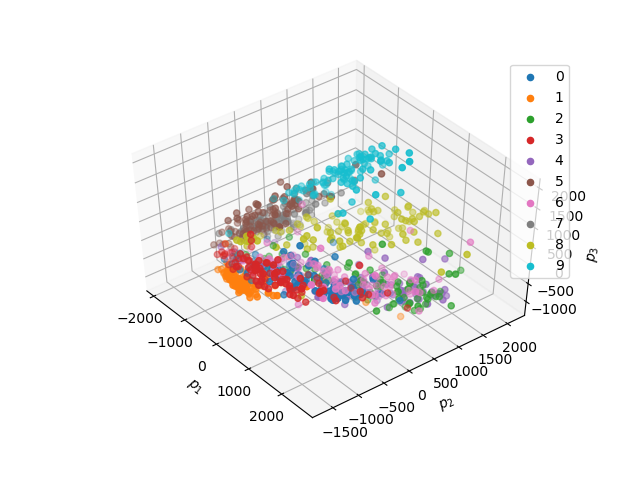

In [102]:
digits_pca = PCA(n_components=150).fit(X_train)
X_pca = digits_pca.transform(X_train)

digits_pca_3_components = PCA(n_components=3).fit(X_train)
X_pca_3_components = digits_pca_3_components.transform(X_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for digit in range(10):
    ax.scatter(X_pca[y_train==digit,0], X_pca[y_train==digit,1], X_pca[y_train==digit,2], label=digit)
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$p_3$')
plt.legend()
plt.show()

As it is evident, PCA managed to pretty much effectively cluster each group together using its best 3 features only. However you can see some points from a different label are seen in other clusters, and this is because we can't distince our instances perfectly using only these 3 features. We will see what this entails when reconstructing our images from a pca. 

### Analyzing the visualization
So how does the above visualization help us. We can use this visualization to see how our data is scattered throughout the space, for example how different clusters are close together while some others are far apart. In my opinion, the best analysis of this visualization comes with interpreting the new features(p1,p2,p3) and learning from it, sa we said earlier that the new features constructed by PCA are simply linear composition of original features. 


## Compression Using Dimensionality Reduction
In this section, we will use PCA as a lossy compression tool. We trained two PCAs on our data one retained 150 of 784 features and the other only 3 features. We create our original 28x28 images from each PCA and show the original image, and reconstructed images from 150 and 3 component PCAs side by side: 

<IPython.core.display.Javascript object>


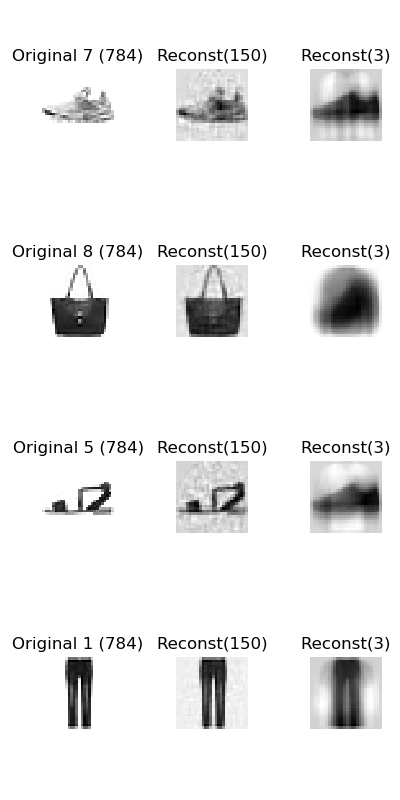

In [104]:
n = 4
image_ids = np.random.choice(X_train.shape[0], size=n, replace=False)
original = X_train[image_ids].reshape(n, 28,-1)
labels = y_train[image_ids]
reconstructed = digits_pca.inverse_transform(X_pca[image_ids]).reshape(n, 28,-1)


reconstructed_3 = digits_pca_3_components.inverse_transform(X_pca_3_components[image_ids]).reshape(n, 28,-1)


fig = plt.figure(figsize=(4,8))
for i in range(n):
    ax = fig.add_subplot(n, 3, 3*i + 1)
    ax.imshow(original[i], cmap='binary')
    ax.axis('off')
    ax.set_title('Original {} (784)'.format(labels[i]))
    ax = fig.add_subplot(n, 3, 3*i + 2)
    ax.imshow(reconstructed[i], cmap='binary')
    ax.axis('off')
    ax.set_title('Reconst(150)')
    
    ax = fig.add_subplot(n, 3, 3*i + 3)
    ax.imshow(reconstructed_3[i], cmap='binary')
    ax.axis('off')
    ax.set_title('Reconst(3)')
    
plt.tight_layout()
plt.show()

As we can see, the 150 component PCA retains much of the information of the original image, and the 3 component PCA has much less resemblane to the original image. However it is quite fascinating that we still can recognize some of the reconstructed images when reconstructed from 3 component PCA.

#### Unrecognizable images and the connection to our 3d visualiazation
As you can see some reconstructed images from the 3-component PCA are not recognizable. For example its a superimposition of a sandal and a shirt. This is representative of the points in our visualization that were groupd in other clusters. 